In [24]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
import warnings 
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [27]:
#Check the sum of null for each attribute
null_check = df.isnull().sum()
print(null_check)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [28]:
#drop the null values
df = df.dropna()
df = df.drop(columns = ['median_house_value'])

In [29]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [30]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from pyclustering.cluster.clarans import clarans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import estimate_bandwidth

In [31]:
#sclaer list
scaler_list = [StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler]

In [32]:
#encoding list 
encoding_list = [LabelEncoder()]

In [21]:
#model_list
kmeans = KMeans(n_clusters=3)
db = DBSCAN(eps=2.5, min_samples=5)
meansh = MeanShift(bandwidth=2)
model_list = [kmeans, db, meansh]
pca = PCA(n_components=2)

<class 'sklearn.preprocessing._data.StandardScaler'>
KMeans(n_clusters=3)
DBSCAN(eps=2.5)
<class 'sklearn.preprocessing._data.MinMaxScaler'>
KMeans(n_clusters=3)
DBSCAN(eps=2.5)
<class 'sklearn.preprocessing._data.MaxAbsScaler'>
KMeans(n_clusters=3)
DBSCAN(eps=2.5)
<class 'sklearn.preprocessing._data.RobustScaler'>
KMeans(n_clusters=3)
DBSCAN(eps=2.5)


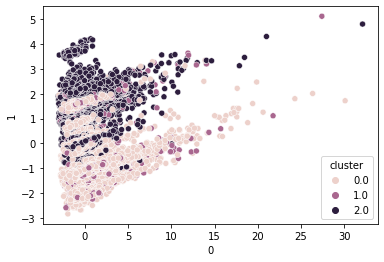

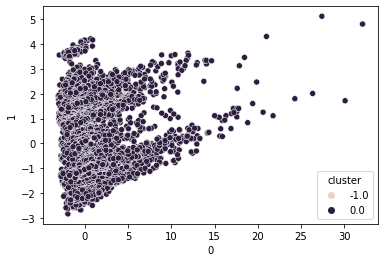

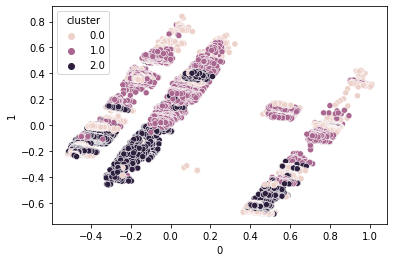

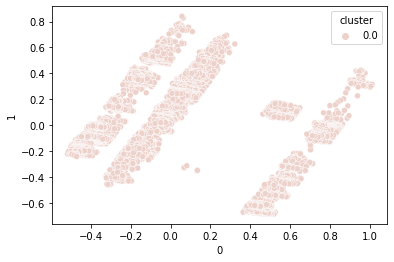

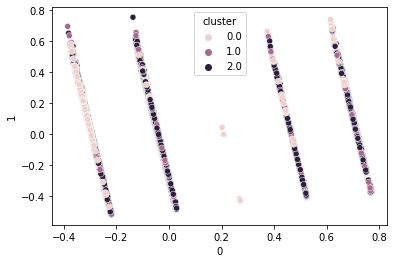

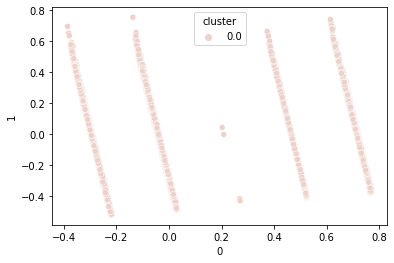

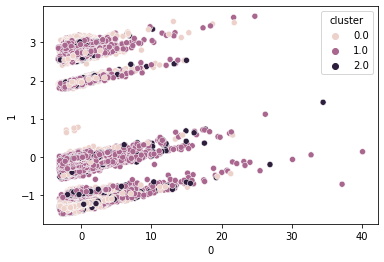

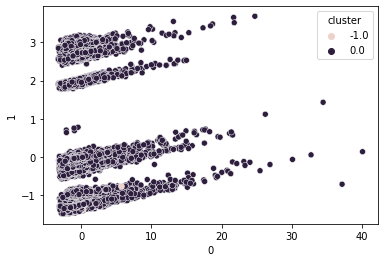

In [22]:
#kmeans, dbscan, MeanShift algorithm
def kmeans(df):
for encoding in encoding_list:
    #Just encode the ocean_property column
    df['ocean_proximity'] = encoding.fit_transform(df['ocean_proximity'])
    #Run the scaler in the list
    for scaler in scaler_list:
        df_scaled = scaler().fit_transform(df)
        print(scaler)
        for model in model_list:
            print(model)
            clusters = model.fit(df_scaled)
            #Added clustered result values to existing dataframes
            df['cluster'] = clusters.labels_
            #create ingredient with pca
            x_pca = pca.fit_transform(df_scaled)
            pca_df = pd.DataFrame(x_pca)
            pca_df['cluster'] = df['cluster'] 
            axs = plt.subplots()
            axs = sns.scatterplot(0, 1, hue='cluster', data=pca_df)


<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.MinMaxScaler'>
<class 'sklearn.preprocessing._data.MaxAbsScaler'>
<class 'sklearn.preprocessing._data.RobustScaler'>


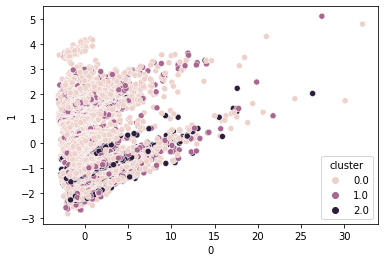

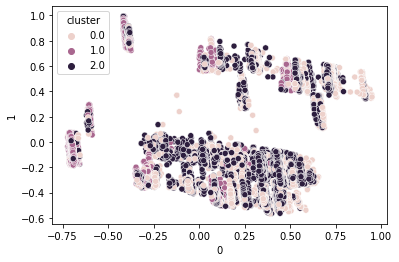

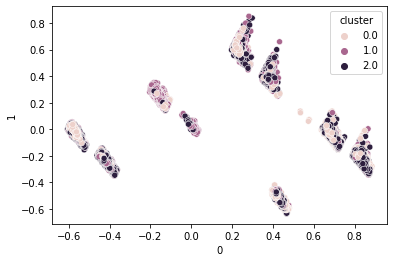

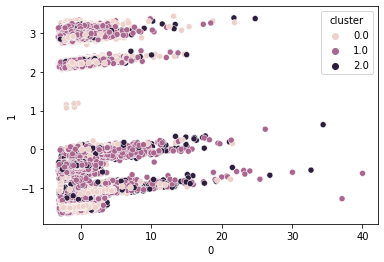

In [93]:
#gmm algorithm
def gmm(df):
gmm = GaussianMixture(n_components=3)
for encoding in encoding_list:
    df['ocean_proximity'] = encoding.fit_transform(df['ocean_proximity'])
    for scaler in scaler_list:
        print(scaler)
        df_scaled = scaler().fit_transform(df)
        gmm_labels = gmm.fit_predict(df_scaled)
        df['cluster'] = gmm_labels
        x_pca = pca.fit_transform(df_scaled)
        pca_df = pd.DataFrame(x_pca)
        pca_df['cluster'] = df['cluster'] 
        axs = plt.subplots()
        axs = sns.scatterplot(0, 1, hue='cluster', data=pca_df)

In [132]:
from pyclustering.cluster.clarans import clarans
from pyclustering.cluster import cluster_visualizer

In [133]:
#clarans algorithm
def clarans(df):
clarans = clarans(df, 2, 6, 4)
for encoding in encoding_list:
    df['ocean_proximity'] = encoding.fit_transform(df['ocean_proximity'])
    for scaler in scaler_list:
        df_scaled = scaler().fit_transform(df)
        #returns the clusters 
        clusters = clarans.get_clusters()
        #returns the mediods
        medoids = clarans.get_medoids()
        # Visualize clustering results
        visualizer = cluster_visualizer()
        visualizer.append_clusters(clusters, df_scaled)
        visualizer.append_cluster(medoids, None, marker='*', markersize=10)
        visualizer.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
def AutoML():
  kmeans(df)
  gmm(df)
  clarans(df)